# <center> Component One David Webb 20104099 <center>

## Data Preparation Tasks

Loading of datasets and filtering out unnecessary data before merging into one dataframe. <br>
All data files were uploaded to a local Jupyter Notebook drive for import. <br>
Additional initial data exploration has been omitted from the notebook for brevity on the assignment hand in.

In [1]:
# import of necessary libraries for the data manipulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

print('libraries imported')

libraries imported


### 1.

In [2]:
# load 'england_school_information' data, filter to secondary schools data and reduce to desirable columns

df1 = pd.read_excel('england_school_information.xlsx')
                    
df1 = df1[df1['ISSECONDARY'] == 1]

df1 = df1[['URN', 'LA', 'GENDER', 'RELCHAR']]

df1.shape

(6396, 4)

### 2.

In [3]:
# load 'england_census' data, generate % school meals column and reduce to desirable columns

df2 = pd.read_excel('england_census.xlsx')

# PFSM is multiplied by 100 to report as a % rather than a decimal to match other % data columns
df2['PFSM'] = df2['NUMFSM'] / df2['NOR'] * 100

df2 = df2[['URN', 'LA', 'PNORG', 'PNORB', 'PSENELSE', 'PSENELK', 'PNUMEAL', 'PNUMENGFL', 'PNUMUNCFL', 'PFSM', 'PNUMFSMEVER']]

df2.shape

(23942, 11)

### 3.

In [4]:
# load 'england_abs' and reduce to desirable columns

df3 = pd.read_excel('england_abs.xlsx')

df3.drop(columns='ESTAB', inplace=True)

df3.shape

(21217, 4)

### 4.

In [5]:
# load 'england_ks4provisional' and reduce to desirable columns

df4 = pd.read_excel('england_ks4provisional.xlsx')

df4 = df4[['URN', 'LEA', 'TPUP', 'P8PUP', 'ATT8SCR', 'P8MEA', 'P8CILOW', 'P8CIUPP', 'EBACCAPS', 'PTL2BASICS_94', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'PTEBACC_94', 'PTEBACC_95', 'PT5EM_94', 'P8_BANDING']]

# set 'LEA' to 'LA' to match other datasets
df4.rename(columns={'LEA':'LA'}, inplace=True)

df4.shape

(5652, 16)

### 5.

In [6]:
# load 'england_ks4-pupdest' and reduce to desirable columns
# assuming typo in the question on the assignment as 'england_ks4-pupdes' is not in the provided dataset

df5 = pd.read_excel('england_ks4-pupdest.xlsx')

df5 = df5[['URN', 'LEA', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER', 'UNKNOWNPER', 'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS', 'UNKNOWNPER_DIS']]

# set 'LEA' to 'LA' to match other datasets
df5.rename(columns={'LEA':'LA'}, inplace=True)

df5.shape

(3878, 8)

### 6.

In [7]:
# merging of individual dataframes into a master set using left joins

dfs = [df2, df3, df4, df5]
df = df1

for each_dfs in dfs:
    df = df.merge(each_dfs, how='left', on=['URN', 'LA'])

df.shape

(6396, 35)

### 7.

In [8]:
# load and join the offstead results to the master set

results = pd.read_excel('OFSTED Ratings.xlsx')

df = df.merge(results, how='left', on = ['URN'])

df.shape

(6396, 36)

df matches the provided model dataframe for the assignment, good to carry on.

## Data Preparation Continued

Dealing with missing data and assessing for any errors.

### 8. Identifying Absent Data

Number of absent of data points for each variable can be calculated using a simple sum by subtracting the data counts in each column from the data counts in the key 'URN' variable column.

In [9]:
# identify number of missing data points per variable

df['URN'].count() - df.count()

URN                        0
LA                         0
GENDER                     0
RELCHAR                  143
PNORG                    864
PNORB                    864
PSENELSE                 868
PSENELK                  866
PNUMEAL                 2239
PNUMENGFL               2239
PNUMUNCFL               2239
PFSM                    2239
PNUMFSMEVER             2241
PERCTOT                 2226
PPERSABS10              2226
TPUP                    2448
P8PUP                   2448
ATT8SCR                 2448
P8MEA                   2448
P8CILOW                 2448
P8CIUPP                 2448
EBACCAPS                2448
PTL2BASICS_94           2448
PTL2BASICS_95           2448
PTEBACC_E_PTQ_EE        2448
PTEBACC_94              2448
PTEBACC_95              2448
PT5EM_94                2448
P8_BANDING              2863
OVERALL_DESTPER         2668
NOT_SUSTAINEDPER        2668
UNKNOWNPER              2668
OVERALL_DESTPER_DIS     2668
NOT_SUSTAINEDPER_DIS    2668
UNKNOWNPER_DIS

As can be seen there are numerous variables with missing data points, in particular the variables indicating disadvantage measures (such as free school meals and fist language % numbers), retention measures for pupils after key stage 4 and progress 8 data, with well over 2000 missing data points from a possible 6396.  The gov.uk website [1] where the data is stored indicates that these variables are not recorded for independent schools as in many cases they may not apply.   The British Education Supplier Association [2] reports that the number of independent and special schools in England is 2,319 and 1,044 respectively.  While this number does not tally exactly with the number of missing data points it is close, suggesting that non reporting of data for independent/special schools is the main cause for the missing data (this is confirmed in the two cells below by cross referenceing the 'MINORGROUP' variable from the 'england_schools_information' with the master dataset, showing that the number of special/independant schools in the data are greatly reduced once entries with null datapoints are removed). <br> <br>
Additionally the gov.uk website indicates that there is a policy that any data that can be used to identify individual pupils is supressed from the dataset.  In particular any metric that could apply to less than 5 pupils is supressed and marked as 'SUPP' in the data.  Although this number is insignificant compared to the number of independent/special schools contained within the data.
<br>
<br>
<font size="0.5">
[1]	‘Understanding school and college performance measures’, GOV.UK. https://www.gov.uk/government/publications/understanding-school-and-college-performance-measures/understanding-school-and-college-performance-measures (accessed Nov. 20, 2020).
<br>
[2]	‘Key UK education statistics’, BESA. https://www.besa.org.uk/key-uk-education-statistics/ (accessed Nov. 20, 2020).
    </font>

In [10]:
# reimport the 'england_school_information' dataset and merging the 'MINORGROUP' column onto the master dataset
dfx = pd.read_excel('england_school_information.xlsx')
dfx = dfx[dfx['ISSECONDARY'] == 1]
dftemp = df.merge(dfx[['URN','LA','MINORGROUP']], how='left', on=['URN','LA'])

# value count of school types on the complete master dataset
dftemp['MINORGROUP'].value_counts()

Academy               2712
Special school        1441
Independent school    1326
Maintained school      880
College                 33
Other                    4
Name: MINORGROUP, dtype: int64

In [11]:
# value count of school types on the master dataset with null values removed
dftemp.dropna()['MINORGROUP'].value_counts()

Academy               2055
Maintained school      786
Special school         323
Independent school       3
Name: MINORGROUP, dtype: int64

### 9. Dealing With Missing Data

Missing data is a widely explored topic in data science [1]–[4] and can be dealt with using numerous different methods.  Three such methods are outlined briefly below with a discussion of the pros and cons of implementation.
<br>
<br>
1.	Listwise deletion - any observation with one or more missing variable data values is deleted from the dataset<br>
 - Pros: simple to implement <br>
 - Cons: reduces size of the dataset, likely to introduce bias into the data particularly if null values are not completely random
<br>
<br>
2.	Variable deletion - any variable from the data set with one or more missing data lines is deleted from the dataset <br>
 - Pros: simple to implement <br>
 - Cons: can drastically reduce the size of the data, takes away useful data from complete entries in the dataset <br>
 - Notes: typically only done if more than 60% of data for the variable is missing [3]
<br>
<br>
3.	Imputation – null entries are imputed with values calculated from other data contained within the dataset.  Several methods can be used, two of which are discussed below with pros and cons of implementation. <br>
 - Statistical value substitution – replacing the null value with a statistical value (mean, median or mode) calculated from the complete values for the variable <br>
    - Pros: simple to implement, no reduction in data from the dataset <br>
    - Reduces variation in the dataset, may impart bias to the data particularly if null values are not completely random <br> <br>
 - Modelled value substitution – replacing the null value with a modelled value based on other data in the dataset.  Methods include machine learning algorithms such as regression (continuous data) and KNN (categorical data). <br>
    - Pros: no reduction in data from the dataset, more likely to maintain the underlying variability of the data, less open to bias <br>
    - Cons: can be complex to implement, accuracy can be reduced in highly dimensional data, relies on good correlation within the dataset

For our data one method we could apply is to subset the data by the OFSETD rating response variable and impute the mean average data for the null values from the specific variable within the subsets.  The issue with this however is that numerous entries have missing data across multiple if not nearly all available variables, which would lead to a drastic reduction in variability across nearly all variables in the dataset.  
<br>
Additionally we have previously identified that the entries with missing data are from a subset dominated of independent/special schools within the dataset (checked via cross referencing the ‘MINORGROUP’ column on the ‘england_school_dataset’ against the ‘URN’ number of data entries with lot of missing data).  Imputing of data from a subset dominated by maintained schools onto a subset of independent schools assumes that there will be no differences in the metrics of the school types which is a dangerous assumption to make and would heavily influence the data based on the characteristics of maintained schools.  Instead a safer option is to remove the data entries with null values and add a caveat to the data that the findings are heavily based on academy/maintained school data to address any bias.
<br>
<br>
<font size="0.5">
[1]	Y. Dong and C.-Y. J. Peng, ‘Principled missing data methods for researchers’, SpringerPlus, vol. 2, May 2013, doi: 10.1186/2193-1801-2-222. <br>
[2]	H. Kang, ‘The prevention and handling of the missing data’, Korean J. Anesthesiol., vol. 64, no. 5, pp. 402–406, May 2013, doi: 10.4097/kjae.2013.64.5.402. <br>
[3]	A. Swalin, ‘How to Handle Missing Data’, Medium, Mar. 19, 2018. https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4 (accessed Nov. 21, 2020). <br>
[4]	D. B. Rubin, ‘Inference and Missing Data’, Biometrika, vol. 63, no. 3, pp. 581–592, 1976, doi: 10.2307/2335739.
</font>

In [12]:
# removal of null value lines from the master dataset
df = df.dropna()

### 10. Data Validity Check

A quick check on the validity of the data is done by first separating the variables into numeric, percentage and categorical value columns.  Each of the variable types can then be assessed for data validity via statistical data summary for the numeric/percentage columns or via assessing the unique entries in the categorical columns.  Checks for each of the variable types along with relevant comment are performed in the subtitled sections below.

#### Data Prep

In [13]:
# split variable columns into numeric, percentage and categorical columns

num_col = ['TPUP', 'P8PUP', 'ATT8SCR', 'P8MEA', 'P8CILOW',
       'P8CIUPP', 'EBACCAPS', ]

percent_col = ['PNORG', 'PNORB', 'PSENELSE',
       'PSENELK', 'PNUMEAL', 'PNUMENGFL', 'PNUMUNCFL', 'PFSM', 'PNUMFSMEVER',
       'PERCTOT', 'PPERSABS10', 'PTL2BASICS_94', 'PTL2BASICS_95',
       'PTEBACC_E_PTQ_EE', 'PTEBACC_94', 'PTEBACC_95', 'PT5EM_94',
       'OVERALL_DESTPER', 'NOT_SUSTAINEDPER', 'UNKNOWNPER',
       'OVERALL_DESTPER_DIS', 'NOT_SUSTAINEDPER_DIS', 'UNKNOWNPER_DIS']

cat_col = ['GENDER', 'RELCHAR', 'P8_BANDING', 'Rating']

# non numeric values temporarily removed from mixed columns to allow the quick generation of summary stats
df_temp = df.replace(['SUPP','NE','LOWCOV', 'SP'], np.nan)

# convert all non categorical columns to float values to allow summary stats on the numbers
non_cat = num_col + percent_col
df_temp_non_cat = df_temp[non_cat].astype('float64')

#### Numeric Variables

In [14]:
# summary stats for the numeric variables
df_temp_non_cat[num_col].describe()

,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000
mean,153.613199,146.172087,43.103221,-0.187209,-0.444610,0.070196,3.746757
std,74.313725,72.355162,15.520925,0.737485,0.853901,0.636419,1.493622
min,6.000000,6.000000,0.000000,-3.530000,-4.480000,-2.580000,0.000000
25%,111.000000,103.000000,39.600000,-0.420000,-0.630000,-0.200000,3.280000
50%,158.000000,149.000000,45.300000,-0.060000,-0.270000,0.140000,3.890000
75%,202.000000,195.000000,51.000000,0.270000,0.060000,0.470000,4.520000
max,563.000000,544.000000,85.100000,2.170000,1.940000,2.410000,8.420000


The 'TPUP' and 'P8PUP' variables are both measures of pupil populations within a school, for valid data we would expect to see no negative values and no clearly incorrect upper values (e.g. 1 million pupils).  As we see neither we can conclude that the data is valid for these variables.
<br> <br>
The 'ATT8SCR' and 'EBACCAPS' variables are both measures of average test score values for pupils.  For valid data we would expect to see no negative values and no spurious outliers in the upper values of the data.  As we see neither we can conclude that the data is valid for these variables.
<br> <br>
Finally the 'P8MEA', 'P8CILOW' and 'P8CIUPP' variables are all measures of progress of pupils in test scores.  As progress can be both negative and positive we are looking for no spurious outliers in the max and min data for these metrics to assess for data validity.  As we see neither we can conclude that the data is valid for these variables.

#### Percentage Variables

In [15]:
# summary stats for the first 10 percentage columns
df_temp_non_cat[percent_col].iloc[:, :11].describe()

,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PFSM,PNUMFSMEVER,PERCTOT,PPERSABS10
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3166.000000
mean,46.877329,53.122798,11.663151,10.182633,15.330755,84.284654,0.384970,17.658388,31.286328,6.382602,16.090998
std,19.136398,19.136439,29.509463,6.316953,18.873235,19.089321,1.813857,13.531762,17.982448,3.867737,10.362532
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,0.000000,0.313234,1.800000,2.100000,1.100000
25%,45.600000,49.100000,0.900000,6.100000,2.800000,79.600000,0.000000,7.734720,17.200000,4.800000,10.500000
50%,48.800000,51.200000,1.600000,9.900000,7.300000,92.500000,0.000000,13.802083,27.900000,5.500000,13.900000
75%,50.900000,54.400000,2.750000,13.800000,20.000000,97.000000,0.200000,23.925435,42.600000,6.600000,18.175000
max,100.000000,100.000000,100.000000,41.300000,96.400000,100.000000,75.300000,85.294118,97.600000,49.600000,87.500000


In [16]:
# summary stats for the remaining 10 percentage columns
df_temp_non_cat[percent_col].iloc[:, 11:].describe()

,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3142.000000,3126.000000,2916.000000,2901.000000,2885.000000,2885.000000
mean,0.590366,0.392277,0.360870,0.225154,0.155078,0.549239,0.929723,0.060905,0.010885,0.895371,0.093279,0.011785
std,0.241459,0.217672,0.265341,0.196193,0.161797,0.240388,0.081566,0.074417,0.019751,0.071058,0.066057,0.022084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.330000,0.000000,0.000000
25%,0.500000,0.270500,0.144000,0.079000,0.043000,0.447000,0.920000,0.030000,0.000000,0.860000,0.050000,0.000000
50%,0.633000,0.386000,0.328000,0.185000,0.114000,0.581000,0.950000,0.050000,0.010000,0.900000,0.090000,0.000000
75%,0.739000,0.510000,0.546000,0.321500,0.212000,0.697000,0.970000,0.070000,0.010000,0.940000,0.130000,0.020000
max,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,0.890000,0.400000,1.000000,0.670000,0.230000


For the percentage columns we are checking for no values >100% and no values <0%.  As we see neither we can conclude that the data is valid for these variables.

#### Categorical Data

In [17]:
# check unique values in categaorical columns for validity

print('GENDER', df_temp['GENDER'].unique())
print('')
print('RELCHAR', df_temp['RELCHAR'].unique())
print('')
print('P8_BANDING', df_temp['P8_BANDING'].unique())
print('')
print('Rating', df_temp['Rating'].unique())

GENDER ['Mixed' 'Girls' 'Boys']

RELCHAR ['Does not apply' 'None' 'Roman Catholic' 'Church of England' 'Jewish'
 'Roman Catholic/Church of England' 'Church of England/Roman Catholic'
 'Muslim' 'Christian' 'Sikh' 'Church of England/Christian' 'Hindu'
 'Catholic']

P8_BANDING [ 3.  1.  4.  5.  2. nan]

Rating ['Good' 'Outstanding' 'Inadequate' 'Requires Improvement' 'Unknown']


Categorical data is trickier to validity check than numerical.  To assess the columns we are essentially checking for any none-sensical values given the description of the variable, for example an entry of 'green' in the 'GENDER' variable would clearly not be a valid value.  Assessing the unique values in each of the categorical variables and cross referencing to the available meta data we can see no non-sensical values so can conclude that the data is valid.

It is noted however that the 'RELCHAR' variable has numerous different entries representing the same thing.  This is solved in the cell below as follows:
 - 'Roman Catholic/Church of England', 'Church of England/Roman Catholic' and 'Christian' are redefined as 'Christian (Non-specific)'
 - 'Does not apply' is redefined as 'None'
 - 'Roman Catholic' is redefined as 'Catholic'

In [18]:
# redefine 'Christian (Non-specific)' entries
chris_non_spec = ['Roman Catholic/Church of England', 'Church of England/Roman Catholic', 'Christian']

for x in chris_non_spec:
    df.loc[df['RELCHAR'].str.contains(x), 'RELCHAR'] = 'Christian (Non-specific)'
    
# redefine 'None' entries
df.loc[df['RELCHAR'].str.contains('Does not apply'), 'RELCHAR'] = 'None'

# redefine 'Catholic' entries
df.loc[df['RELCHAR'].str.contains('Roman Catholic'), 'RELCHAR'] = 'Catholic'

print('RELCHAR', df_temp['RELCHAR'].unique())

RELCHAR ['Does not apply' 'None' 'Roman Catholic' 'Church of England' 'Jewish'
 'Roman Catholic/Church of England' 'Church of England/Roman Catholic'
 'Muslim' 'Christian' 'Sikh' 'Church of England/Christian' 'Hindu'
 'Catholic']


## 11. Sanity Checks

Finally sanity checks are to be performed upon the data.  These are to check for non-sensical values between related variables within the database, for example percentage variables for all the categories within a population not totalling 100% indicating either a category has been missed or a miscount has taken place.  Two sanity checks for the master dataset are outlined below followed by a running of the check and comment on the results.

1.	The ‘P8CILOW’ and ‘P8CIUPP’ variables are descriptive statistics of the Progress 8 measure score for pupils within a school, namely the lower and upper 95% confidence interval (CI) boundaries respectively.  As the lower 95% CI boundary will never be greater than the upper 95% CI boundary we can initiate a sanity check by creating a new column subtracting the lower boundary value from the upper boundary value for each data entry.  A histogram plot for this new column should show no negative values to prove that the data is valid.
<br><br>
2.	The ‘OVERALL_DESTPER’, ‘NOT_SUSTAINEDPER’, and ‘UNKNOWNPER’ columns represent percentage values of all possible outcomes for whether pupils remain in education or employment after completing key stage 4.  A histogram of a column summing the values for these 3 variables for each data entry should show a population where all the values are equal to 100 for the data to be valid.


### Sanity Check 1

Text(0, 0.5, 'Number of schools')

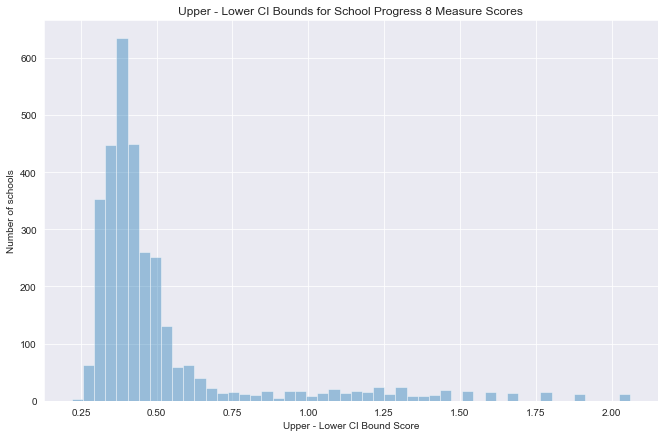

In [19]:
# creation of sanity check column
df['check1'] = df['P8CIUPP'] - df['P8CILOW']

# histogram plot of first sanity check
plt.figure(figsize=(11,7))
sns.distplot(df['check1'], kde=False)
plt.title('Upper - Lower CI Bounds for School Progress 8 Measure Scores')
plt.xlabel('Upper - Lower CI Bound Score')
plt.ylabel('Number of schools')

The histogram of the temporary check column shows no negative values as required for the data to be valid, therefore we can conclude that the sanity check has been passed.

### Sanity Check 2

Text(0, 0.5, 'Number of schools')

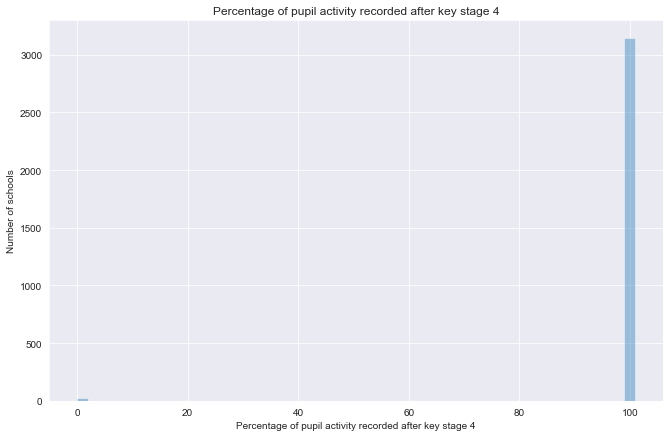

In [20]:
# temprarily convert non-numeric values to zero as set columns as floats to allow math functions
df_temp = df.replace(['SUPP','NE','LOWCOV', 'SP'], 0)
cols = ['OVERALL_DESTPER', 'NOT_SUSTAINEDPER', 'UNKNOWNPER']
df_temp[cols].astype('float64', copy=False)

# sum varaibles of interest
df_temp['check2'] = df_temp['OVERALL_DESTPER'] + df_temp['NOT_SUSTAINEDPER'] + df_temp['UNKNOWNPER']

# histogram plot of second sanity check
plt.figure(figsize=(11,7))
sns.distplot(df_temp['check2'], kde=False)
plt.title('Percentage of pupil activity recorded after key stage 4')
plt.xlabel('Percentage of pupil activity recorded after key stage 4')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.ylabel('Number of schools')

The histogram of the temporary check column shows all values at 100% (barring a small minority at 0% representing suppressed data) as required for the data to be valid, therefore we can conclude that the sanity check has been passed.
<br><br>
All checks how now been performed on the master dataset allowing us to progress to export the data for use in the further component exercises.

In [21]:
# remove temporary check column
df.drop(columns='check1', inplace=True)

# export master dataframe and key for use in future components
df.to_csv(r'C:\Users\dave_\OneDrive\Documents\MMU Data Science Masters\Introduction to Data Science\Assignment\Data\df.csv', index=False)